<a href="https://colab.research.google.com/github/tkasod2/TIL/blob/main/zerobase/homework/%EC%B5%9C%EC%A2%85%ED%8F%89%EA%B0%80_%EA%B3%BC%EC%A0%9C_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#### 제로베이스(https://zero-base.co.kr/)
#### 바로 써먹는 분석 완주반 
---
#### **Notice!** 
- 제출 기한을 반드시 지켜주세요 
- 제출 전 코드가 정상적으로 실행되는지 검토해주세요
- 제출하신 코드에 대해 멘토님의 일부 주관적인 부분점수가 반영될 수 있습니다
- 부분점수 반영 시 상세한 피드백을 드릴 예정이오니, 문의가 있을시 멘토님과 담당 매니저님이 적극 소통할 예정입니다
---
# **최종 평가**
- 모든 범위 포함
- 10문제 총 100점
---

### 문제 1. 다음 조건에 맞는 함수를 구현하세요 (10점)

* 데이터가 담긴 문자열을 파싱하여 간단한 통계량을 구하는 함수입니다.
* 입력으로 시험 과목과 점수가 들어있는 문자열을 받습니다. 예: "수학-90점,국어-60점,수학-70점"
* 과목 사이는 쉼표로 구분되어 있고, 과목과 점수 사이는 하이픈(-)으로 구분되어 있습니다.
* 출력으로 가장 평균 점수가 높은 과목과 그 과목의 최고점을 문자열로 출력합니다. 예: "수학의 최고점은 90점입니다"
* 위 예시에서 수학의 평균 점수는 80점(90점과 70점의 평균), 국어의 평균 점수는 60점으로 수학이 평균 점수가 가장 높고, 수학의 최고점은 90점이므로 "수학의 최고점은 90점입니다"가 출력됩니다.
* 출력할 때 점수는 "xx의 최고점은 xx점입니다"와 같이 문자열로 출력합니다.
* 더 많은 예는 테스트 코드를 참고해주세요.

* Hint: 변수를 넣은 문자열을 만들 때는 f-string을 이용하면 편리합니다. 예컨대, name이라는 변수에 "철수"가 들어있을 때 f"내 이름은 {myname}입니다"는 "내 이름은 철수입니다"라는 문자열이 됩니다.
* Hint 2: 가장 큰 숫자를 구할 때는 파이썬의 내장 함수인 `max` 함수를 이용할 수 있습니다.

In [ ]:
def extract_best_subject(data):
  # =================================================================================
  # 여기에 코드를 입력하세요
  # 입력 타입은 데이터가 담긴 문자열(string)입니다.
  # 출력 타입은 문자열 세 개가 담긴 튜플(tuplae)입니다.

  data = data.split(',')
  lst = []
  tup = ()
  for x in [x.split('-') for x in data]:
    lst.append([x[0],int(x[1].split('점')[0])])

  dict1 = {} # count
  dict2 = {} # average
  for x in lst:
    if x[0] in dict1.keys():
      dict1[x[0]] += 1
      dict2[x[0]] += x[1] # sum
    else : 
      dict1[x[0]] = 1
      dict2[x[0]] = x[1]

  for k in dict1.keys():
    dict2[k] = dict2[k]/dict1[k]

  max_average_subject = [k for k,v in dict2.items() if v ==max(dict2.values())][0]
  max_score = max([x[1] for x in lst if x[0] == max_average_subject])
  answer =f'{max_average_subject}의 최고점은 {max_score}점입니다.'
  return answer
  # =================================================================================

In [ ]:
# 테스트 코드입니다.
# 함수가 제대로 구현되었는지 평가를 위한 코드이니 수정하지 마세요.
# 실행했을 때 아무 에러도 뜨지 않으면 성공입니다.

assert extract_best_subject("수학-90점,국어-60점,수학-70점") == "수학의 최고점은 90점입니다."
assert extract_best_subject("과학-20점,국어-30점,과학-50점,수학-20점,과학-60점") == "과학의 최고점은 60점입니다."
assert extract_best_subject("영어-20점,국어-20점,국어-30점,국어-50점,국어-10점") == "국어의 최고점은 50점입니다."
assert extract_best_subject("사회-100점,수학-80점,사회-20점") == "수학의 최고점은 80점입니다."

---

### 문제 2. 판다스 데이터 프레임을 다음 설명에 맞게 인덱싱 하세요. (10점)

* 다음은 매출 데이터가 담긴 데이터 프레임입니다.

데이터

In [ ]:
import pandas as pd

sales = pd.DataFrame(
    [{"서울": 30, "부산": 10, "제주": 10},
     {"서울": 40, "부산": 100, "제주": 40},
     {"서울": 50, "부산": 10, "제주": 70},
    ],
    index=pd.Series([2020, 2021, 2022], name='연도')
  )

sales

,서울,부산,제주
연도,,,
2020,30,10,10
2021,40,100,40
2022,50,10,70


#### 2-1 서울과 제주에 해당하는 열만 인덱싱해 보세요

다음과 같은 결과가 나오면 통과입니다.

![seoul and jeju](https://files.slack.com/files-pri/T25783BPY-F02SMG021LZ/image.png?pub_secret=a75a0c649c)

In [ ]:
# =================================
# 여기에 코드를 작성하세요
sales[['서울','제주']]
# =================================

,서울,제주
연도,,
2020,30,10
2021,40,40
2022,50,70


#### 2-2 부산의 매출이 10이었던 행만 인덱싱해 보세요

다음과 같은 결과가 나오면 통과입니다.

![seoul](https://files.slack.com/files-pri/T25783BPY-F02S8SE13T4/image.png?pub_secret=f1ec249c85)

In [ ]:
# =================================
# 여기에 코드를 작성하세요
sales[sales['부산']==10]
# =================================

,서울,부산,제주
연도,,,
2020,30,10,10
2022,50,10,70


#### 2-3 2020년과 2021년만 인덱싱해 보세요

다음과 같은 결과가 나오면 통과입니다.

![seoul](https://files.slack.com/files-pri/T25783BPY-F02S8TK9CCT/image.png?pub_secret=1df0d85bcf)

In [ ]:
# =================================
# 여기에 코드를 작성하세요
sales[sales.index.isin([2020,2021])]
# =================================

,서울,부산,제주
연도,,,
2020,30,10,10
2021,40,100,40


---

### 문제 3. Accuracy, precision, recall을 계산하는 함수를 직접 구현해 보세요. (10점)

Accuracy, precision, recall은 분류 모델의 성능을 측정하기 위해 가장 널리 쓰이는 지표들입니다. 다음을 참고해서 이 지표를 계산하는 함수를 직접 구현해 보세요.

- accuracy는 정확도라고도 불리며 전체 샘플 중 모델의 예측값과 실제값이 일치하는 비율입니다.
- precision은 정밀도라고도 불리며 모델이 참으로 예측한 것 중 실제 참의 비율입니다.
- recall은 재현율이라고도 불리며 실제 참인 것 중 모델이 참으로 예측한 것의 비율입니다.
- precision과 recall의 차이를 그림으로 나타내면 다음과 같습니다.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/1024px-Precisionrecall.svg.png" height="50%" width="50%">


함수 스펙
* 입력으로 예측 리스트(y_pred)와 정답 리스트(p_true)를 받습니다.
* positive는 1로, negative는 0으로 표현됩니다.
* 출력으로는 accuracy, precision, recall 값을 부동소수점(float)으로 출력합니다. 즉, 세 개의 float가 담긴 tuple이 됩니다.
* 만약 (분모가 0이라서) 계산할 수 없는 수치가 있다면 None으로 출력해 주세요.
* 각 메트릭은 0과 1 사이의 값입니다. (또는 None입니다.)
* 예시는 테스트 코드를 참고해주세요

In [ ]:
def calculate_metrics(y_pred, y_true):
  # =================================================================================
  # True 예측
  TP = 0
  FP = 0
  # False 예측
  TN = 0 # 정답
  FN = 0 # 오답

  for a,b in zip(y_pred,y_true):
    if a == 1 :
      if b == 1 :
        TP += 1
      else :
        FP +=1
    elif a == 0 :
      if b == 0 :
        TN += 1
      else :
        FN += 1
  try : 
    precision = TP/(TP+FP)#True 예측 중 정답률

  except ZeroDivisionError:
    precision = None


  try : 
    recall = TP/(TP+FN)#True중 True라고 예측한 비율
  except ZeroDivisionError:
    recall = None

  try : 
    accuracy = (TP+TN)/(TP+FN+TN+FP)
  except ZeroDivisionError:
    accuracy = None


  return (accuracy,precision,recall)
  # =================================================================================

In [ ]:
# 테스트 코드입니다.
# 함수가 제대로 구현되었는지 평가를 위한 코드이니 수정하지 마세요.
# 실행했을 때 아무 에러도 뜨지 않으면 성공입니다.

assert calculate_metrics([0,0,0,0], [1,0,1,0]) == (0.5, None, 0.0)
assert calculate_metrics([1,1,1,1], [1,0,1,0]) == (0.5, 0.5, 1.0)
assert calculate_metrics([1,0,1,0], [1,0,1,0]) == (1.0, 1.0, 1.0)
assert calculate_metrics([0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,1]) == (0.9, None, 0.0)
assert calculate_metrics([0,0,0,0,0,0,0,0,1,1], [0,0,0,0,0,0,0,0,0,1]) == (0.9, 0.5, 1.0)
assert calculate_metrics([0,0,0,0,0,0,0,0,0,1], [0,0,0,0,0,1,1,1,1,1]) == (0.6, 1.0, 0.2)

---

**문제 4-7. 다음은 Iris 붓꽃에 관한 데이터이며, 각 column에 대한 설명은 다음과 같습니다.**
* sepal lengh: 꽃받침 길이
* sepal width: 꽃받침 넓이
* petal length: 꽃잎 길이
* petal width: 꽃잎 넓이
* flower_code: 꽃의 종류 (id)

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['flower_code'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_code
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 문제 4. Pandas 를 활용하여 각 꽃의 종류 별 평균 꽃잎의 길이를 구하시오
* dataframe 으로 출력합니다. 
* flower_code 를 dataframe 의 index 로 지정합니다.
* 다음과 같은 결과가 나오면 통과입니다.

![seoul](https://files.slack.com/files-pri/T25783BPY-F02S8LAABPX/image.png?pub_secret=994202f658)

In [ ]:
# =================================
# 여기에 코드를 입력하시오
df.groupby('flower_code')['petal length (cm)'].mean().reset_index().set_index('flower_code')
# =================================

,petal length (cm)
flower_code,
0,1.462
1,4.260
2,5.552


---

### 문제 5. 데이터셋에서 가장 긴 길이의 꽃받침을 가진 꽃(data)이 속해있는 꽃의 아이디(flower_code)는 무엇입니까? 
* 아래에 답을 내기 위한 코드를 작성하고, 해당하는 꽃의 아이디를 flower_code_which_has_the_longest_sepal 에 int 형으로 저장하시오.

In [ ]:
# =================================
# 여기에 코드를 입력하시오
flower_code_which_has_the_longest_sepal = int(df[df['sepal length (cm)']==df['sepal length (cm)'].max()]['flower_code'])
flower_code_which_has_the_longest_sepal
# =================================

2

---

### 문제 6. 꽃받침 길이를 x축으로, 꽃받침 넓이를 y축으로 하는 산점도(Scatter Plot) 을 그리시오

* 점의 색상은 flower_code 로 구분합니다.

In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'flower_code'],
      dtype='object')

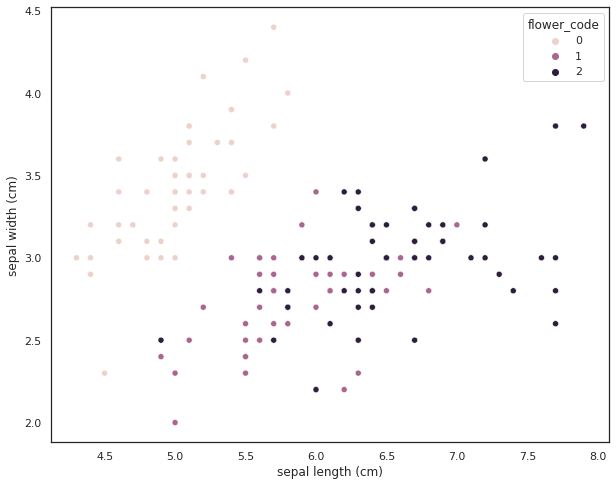

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# =================================
# 여기에 코드를 입력하시오
sns.set_theme(style="white", palette="pastel")
g = sns.scatterplot(x='sepal length (cm)', y= 'sepal width (cm)',hue = 'flower_code' ,data=df)
g.figure.set_size_inches(10,8)
# =================================

---

### 문제 7. flower_code 를 제외한 나머지 4개의 feature 를 통해 flower_code 를 예측하는 코드를 작성하시오. 

* logistic regression 을 이용합니다.
* 학습에는 X_train, y_train
* 테스트에는 X_test, y_test 를 이용합니다.
* 정확도가 90% 이상이면 통과입니다.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['flower_code'], axis=1)
y = df['flower_code']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


In [ ]:
# ===========================
# 여기에 코드를 입력합니다.
clf = LogisticRegression(max_iter=500)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_pred, y_test)
# ==========================

0.9833333333333333

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


---

**문제 8-10. 다음은 텍스트 코퍼스입니다.**

In [ ]:
corpus = [
          "Show me the money!",
          "You can't handle the truth!",
          "I'm going to make him an offer he can't refuse.",
          "After all, tomorrow is another day!",
          "I'm the king of the world!",
          "There's no place like home.",
          "You're gonna need a bigger boat."
]

### 문제 8. 텍스트 전처리 함수를 구현해보세요.

함수 스펙
- 문자열을 입력으로 받습니다.
- 모든 문자를 소문자로 바꿉니다.
- 문장부호(마침표, 쉼표, 느낌표)를 제거합니다.
- 문장을 띄어쓰기 단위로 토크나이징합니다.
- 각 토큰이 나온 횟수를 세어서 bag of words 형태로 반환합니다.
- 반환 형식은 토큰(문자열)과 출현 횟수(숫자)의 딕셔너리입니다.

In [ ]:
def preprocess_document(text):
  # =================================================================================
  # 여기에 코드를 입력하세요
  # 입력 타입은 문장(문자열)입니다.
  # 출력 타입은 토큰(문자열)의 리스트(list)입니다.
  lowered_text = text.lower()
  removed_text = [x for x in lowered_text if x not in ["!",".",","]]
  cleaned_text = ''.join(removed_text)
  BOW = cleaned_text.split(' ')
  count_dict = {}
  for i in BOW:
    if i not in count_dict.keys():
      count_dict[i] = 1
    else :
      count_dict[i] += 1
  return count_dict
  # =================================================================================

In [ ]:
# 테스트 코드입니다.
# 함수가 제대로 구현되었는지 평가를 위한 코드이니 수정하지 마세요.
# 실행했을 때 아무 에러도 뜨지 않으면 성공입니다.

assert preprocess_document("Show me the money!") == {'me': 1, 'money': 1, 'show': 1, 'the': 1}
assert preprocess_document("You can't handle the truth!") == {"can't": 1, 'handle': 1, 'the': 1, 'truth': 1, 'you': 1}
assert preprocess_document("I'm the king of the world!") == {"i'm": 1, 'king': 1, 'of': 1, 'the': 2, 'world': 1}
assert preprocess_document("There's no place like home.",) == {'home': 1, 'like': 1, 'no': 1, 'place': 1, "there's": 1}

In [ ]:
# 이후 문제를 위해 주어진 코퍼스를 전처리해놓는 코드입니다.
# 코드를 수정하지 말고 실행하세요.
preprocessed_corpus = [preprocess_document(document) for document in corpus]

---

### 문제 9. TF-IDF를 계산하는 함수를 구현해 보세요.

다음과 같은 TF와 IDF의 정의를 사용합니다.
- TF는 주어진 문장에서 해당 토큰이 출현한 횟수입니다.
- IDF는 (전체 문서 수 + 1)을 (해당 토큰이 출현한 문서 수 + 1)로 나눈 뒤 밑이 2인 로그를 취한 값입니다.
- 다음 식을 참고하세요.

$$\text{IDF} = \log_2{\frac{|D| + 1}{|\{d \in D : t \in D\}| + 1}}$$

- $D$는 전체 문서의 집합, 즉 코퍼스입니다.
- $|D|$는 전체 문서의 개수를 뜻합니다.
- $|\{d \in D : t \in D\}|$는 코퍼스에서 토큰 t가 들어 있는 문서의 개수를 뜻합니다.
- 한 문서에 토큰이 여러번 출현하더라도 IDF를 계산할 때는 한번 출현한 것과 같이 취급됩니다.
- 분모와 분자에 1을 더해주는 이유는 토큰이 코퍼스에 없을 때 0으로 나누는 것을 막기 위해서입니다.

TF 함수와 IDF 함수를 구현해보세요.

In [ ]:
preprocessed_corpus

[{'me': 1, 'money': 1, 'show': 1, 'the': 1},
 {"can't": 1, 'handle': 1, 'the': 1, 'truth': 1, 'you': 1},
 {'an': 1,
  "can't": 1,
  'going': 1,
  'he': 1,
  'him': 1,
  "i'm": 1,
  'make': 1,
  'offer': 1,
  'refuse': 1,
  'to': 1},
 {'after': 1, 'all': 1, 'another': 1, 'day': 1, 'is': 1, 'tomorrow': 1},
 {"i'm": 1, 'king': 1, 'of': 1, 'the': 2, 'world': 1},
 {'home': 1, 'like': 1, 'no': 1, 'place': 1, "there's": 1},
 {'a': 1, 'bigger': 1, 'boat': 1, 'gonna': 1, 'need': 1, "you're": 1}]

In [ ]:
def tf(token, document):
  # =================================================================================
  # 여기에 코드를 입력하세요
  # token은 문자열(string), document는 위에서 구현한 preprocess_document 함수의 결과물, 즉 딕셔너리입니다.
  # 출력 타입은 숫자(int)입니다.
  return document[token]
  # pass
  # =================================================================================

In [ ]:
import math

def idf(token, corpus):
  # =================================================================================
  # 여기에 코드를 입력하세요
  # token은 문자열(string), corpus는 전처리된 문서(딕셔너리)의 리스트입니다.
  # 출력 타입은 숫자(float)입니다.
  # 로그 계산을 위해 math.log2 함수를 사용하세요.
  D = len(corpus)
  EM_DOCT = 0
  for dic in corpus:
    if token in dic.keys():
      EM_DOCT+=1
  IDF = math.log2((D+1)/(EM_DOCT+1))
  return IDF
  # pass
  # =================================================================================

In [ ]:
# 이 코드는 수정하지 마세요.
# 위의 함수가 구현되면 사용할 수 있게 됩니다.

def tfidf(token, document, corpus):
  return tf(token, document) * idf(token, corpus)


In [ ]:
# 테스트 코드입니다.
# 함수가 제대로 구현되었는지 평가를 위한 코드이니 수정하지 마세요.
# 실행했을 때 아무 에러도 뜨지 않으면 성공입니다.

assert tf("i", preprocess_document("I feel the need, the need for speed!")) == 1

assert idf("the", preprocessed_corpus) == 1
assert idf("tomorrow", preprocessed_corpus) == 2

assert tf("need", preprocess_document("I feel the need, the need for speed!")) == 2
assert idf("need", preprocessed_corpus) == 2

assert tfidf("need", preprocess_document("I feel the need, the need for speed!"), preprocessed_corpus) == 4

---

### 문제 10. 위에서 구현한 TF-IDF를 이용해 사전 기반 감정 분석 모델을 만들어 보세요.

단순히 토큰이 사전에 있는지 없는지를 검사하는 것에서 벗어나 토큰의 TF-IDF 점수를 이용해 사전 기반 감정 분석을 조금 더 개선할 수 있습니다.

다음 조건을 만족하는 함수를 구현해보세요.
- 전처리된 문서(dictionary), 코퍼스(list of documents), 감성 사전(dictionary)를 입력으로 받습니다.
- 위에서 구현한 TF-IDF 함수를 이용해 문장의 각 토큰의 TF-IDF 점수를 구합니다.
- 토큰마다 감성 사전의 긍부정 점수에 TF-IDF 점수를 곱합니다. (사전에 없는 단어는 0점으로 계산합니다.)
- 토큰마다 계산한 점수를 합하여 문장의 점수를 구합니다.
- 최종적으로 계산된 문장의 긍부정 점수(float)를 반환합니다.


In [ ]:
# 문제에서 사용할 감성 사전입니다. 수정하지 마세요.
sentiment_dictionary = {
    'amazing': 1,
    'awesome': 1,
    'awful': -1,
    'bad': -1,
    'beautiful': 1,
    'disappointing': -1,
    'excited': 1,
    'fun': 1,
    'hate': -1,
    'love': 1,
    'nice': 1,
    'okay': 1,
    'sad': -1,
    'wonderful': 1,
    'wrong': -1,
    'mad': -1,
    'hell': -1,
}

In [ ]:
def calculate_sentiment(document, corpus, sent_dict):
  # =================================================================================
  # 여기에 코드를 입력하세요
  # document 전처리된 문서(딕셔너리), corpus는 전처리된 문서(딕셔너리)의 리스트, sent_dict는 감성 사전(딕셔너리)입니다.
  # document의 각 토큰마다 tf-idf 점수를 계산하세요.
  # 각 토큰의 tf-idf 점수와 감성 사전의 긍부정 점수(미등록 단어면 0)를 곱한 값을 모두 합하여 문장의 긍부정 점수를 반환하세요.
  # 출력 타입은 숫자(float)입니다.
  score = 0
  for i in sent_dict.keys():
    try :
      score += tfidf(i,document, corpus)*sentiment_dictionary[i]
    except KeyError:
      pass
  return score
  # pass
  # =================================================================================

In [ ]:
assert calculate_sentiment(preprocess_document("I'm as mad as hell, and I'm not going to take this anymore!"), preprocessed_corpus, sentiment_dictionary) == -6
# mad와 hell이 부정 단어이며 둘 다 tf-idf 점수는 3입니다.
# -1 * 3 + -1 * 3 -> 문장의 긍부정 점수는 -6입니다.

assert calculate_sentiment(preprocess_document("Love means never having to say you're sorry."), preprocessed_corpus, sentiment_dictionary) == 3
# love는 긍정 단어이며 tf-idf 점수는 3입니다.
# 1 * 3 -> 문장의 긍부정 점수는 3입니다.